## 1. EDA

In [170]:
#mount the gdrive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [169]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
import pandas as pd
import requests


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [171]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Exploratory_Data_Analysis/Dataset/Loan_train.csv')
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [173]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [174]:
numeric_cols_names = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric Columns:")
print(numeric_cols_names)

# Get names of categorical columns
categorical_cols_names = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:")
print(categorical_cols_names)

Numeric Columns:
['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']

Categorical Columns:
['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [175]:
numeric_cols = df.select_dtypes(include=['number'])
categorical_cols = df.select_dtypes(include=['object'])

print("Numeric Columns:")
print(numeric_cols)

print("\nCategorical Columns:")
print(categorical_cols)

Numeric Columns:
          id  person_age  person_income  person_emp_length  loan_amnt  \
0          0          37          35000                0.0       6000   
1          1          22          56000                6.0       4000   
2          2          29          28800                8.0       6000   
3          3          30          70000               14.0      12000   
4          4          22          60000                2.0       6000   
...      ...         ...            ...                ...        ...   
58640  58640          34         120000                5.0      25000   
58641  58641          28          28800                0.0      10000   
58642  58642          23          44000                7.0       6800   
58643  58643          22          30000                2.0       5000   
58644  58644          31          75000                2.0      15000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              11.49             

In [176]:
df.shape

(58645, 13)

In [177]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [178]:
# Check for missing values
# Give the count of Null values for each column i.e., variables
df.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


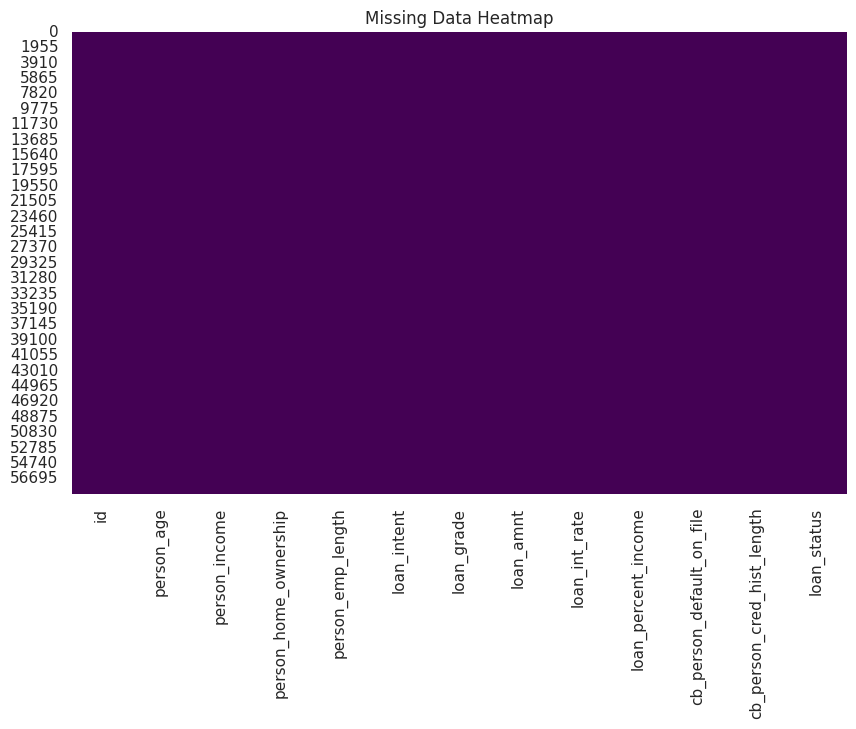

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
# Missing data heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

**Plot the boxplot for BHK, Size, Bathroom, and Rent.**

A Box plot is a way to visualize the distribution of the data by using a box and some vertical lines. It is known as the whisker plot. The data can be distributed between five key ranges, which are as follows:

- Minimum: Q1-1.5*IQR
- 1st quartile (Q1): 25th percentile
- Median:50th percentile
- 3rd quartile(Q3):75th percentile
- Maximum: Q3+1.5*IQR
- Here IQR represents the InterQuartile Range which starts from the first quartile (Q1) and ends at the third quartile (Q3).

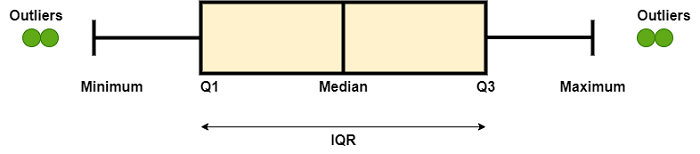

Source: [Boxplot](https://www.javatpoint.com/box-plot-in-python-using-matplotlib)

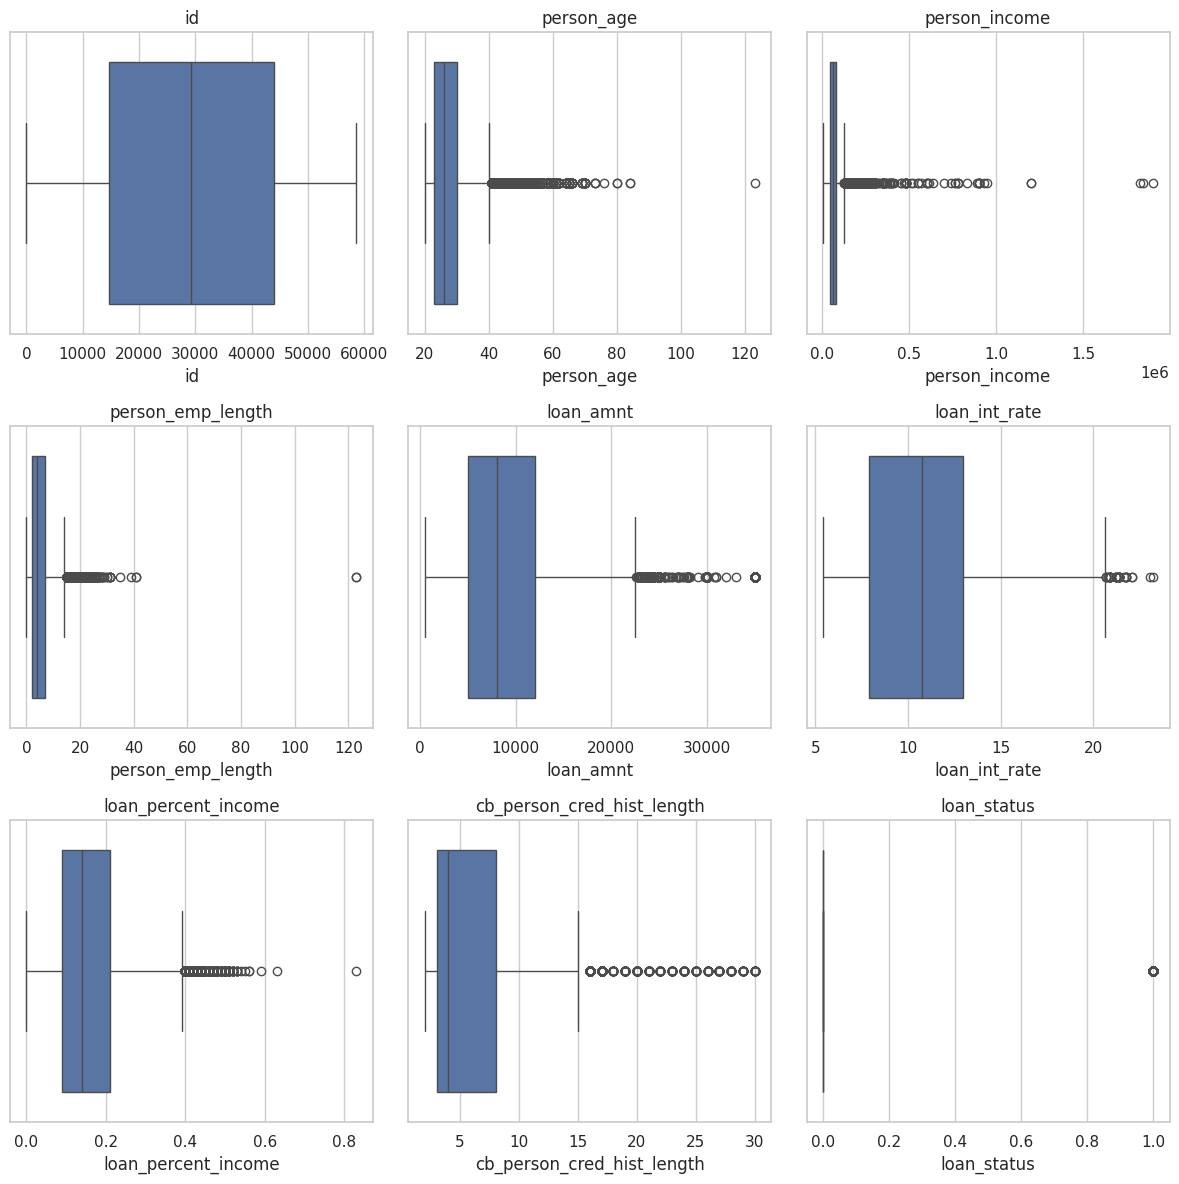

In [180]:
# Create subplots
fig, ax = plt.subplots(3, 3, figsize=(12, 12))  # Adjusted figsize for better layout

sns.set_theme(style="whitegrid")

# Flatten the 2D array of axes for easy indexing
ax = ax.flatten()

# Plotting
for axid, col in enumerate(numeric_cols_names):
    sns.boxplot(x=df[col], ax=ax[axid])
    ax[axid].set_title(col)  # Set title for each subplot

# Hide any unused subplots
for i in range(len(numeric_cols_names), len(ax)):
    ax[i].axis('off')  # Turn off any unused axes

plt.tight_layout()
plt.show()

In [181]:
# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
print("Original DataFrame shape: ", df.shape[0],"x", df.shape[1])
print(df)
# Remove outliers
df = remove_outliers(df, numeric_cols_names)


print("\nCleaned DataFrame without outliers:b ", df.shape[0],"x", df.shape[1])
print(df)

Original DataFrame shape:  58645 x 13
          id  person_age  person_income person_home_ownership  \
0          0          37          35000                  RENT   
1          1          22          56000                   OWN   
2          2          29          28800                   OWN   
3          3          30          70000                  RENT   
4          4          22          60000                  RENT   
...      ...         ...            ...                   ...   
58640  58640          34         120000              MORTGAGE   
58641  58641          28          28800                  RENT   
58642  58642          23          44000                  RENT   
58643  58643          22          30000                  RENT   
58644  58644          31          75000              MORTGAGE   

       person_emp_length loan_intent loan_grade  loan_amnt  loan_int_rate  \
0                    0.0   EDUCATION          B       6000          11.49   
1                    6.0   

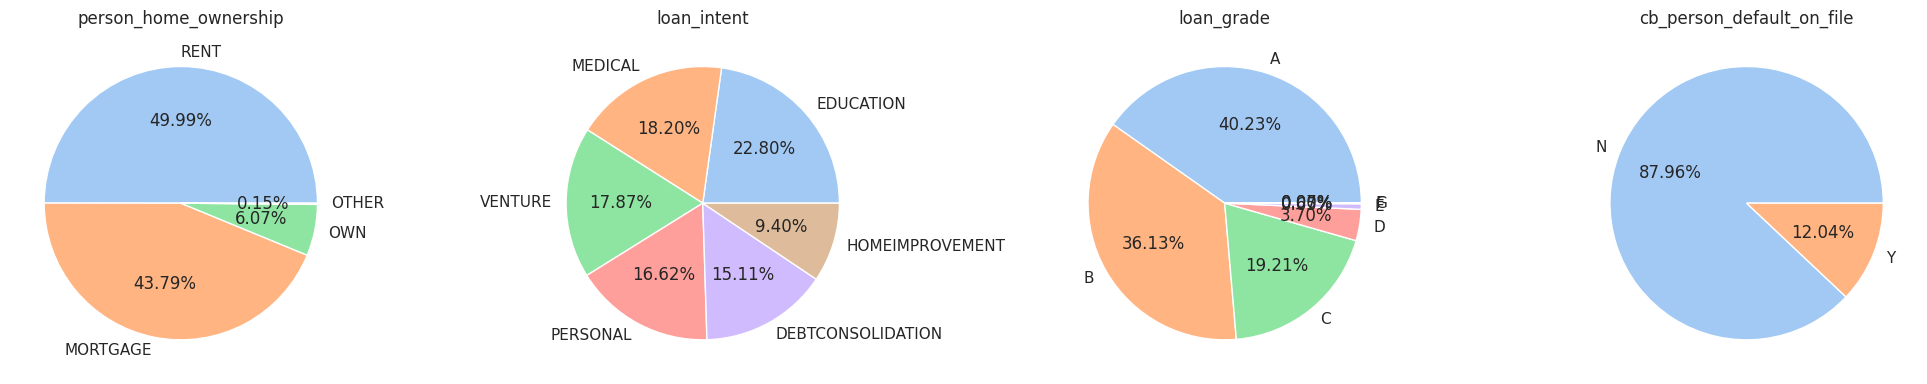

In [182]:
# Create subplots for 4 categorical columns
fig, ax = plt.subplots(1, 4, figsize=(20, 4))  # Adjusted for 4 columns

# Plotting pie charts
for axid, col in enumerate(categorical_cols_names):
    col_dist = df[col].value_counts()
    piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
    col_dist.plot(kind='pie', colors=piec_colors, autopct='%1.2f%%', ax=ax[axid], ylabel='')  # Hide ylabel for clarity
    ax[axid].set_title(col)  # Set title for each subplot

plt.tight_layout()
plt.show()

In [183]:
# Define the columns
ordinal_col = 'loan_grade'  # Change to a single column name
nominal_col = [
    'person_home_ownership',
    'loan_intent',
    'cb_person_default_on_file'
]

# Step 1: Label Encoding for ordinal categorical variable
le = LabelEncoder()
df[ordinal_col] = le.fit_transform(df[ordinal_col])

# Step 2: One-Hot Encoding for nominal categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), nominal_col)
    ],
    remainder='passthrough'
)
df_encoded = preprocessor.fit_transform(df)
df_encoded = pd.DataFrame(df_encoded, columns=preprocessor.get_feature_names_out())


In [184]:
numeric_features = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric Columns:")
print(numeric_features)

# Get names of categorical columns
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:")
print(categorical_features)

Numeric Columns:
['id', 'person_age', 'person_income', 'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']

Categorical Columns:
['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']


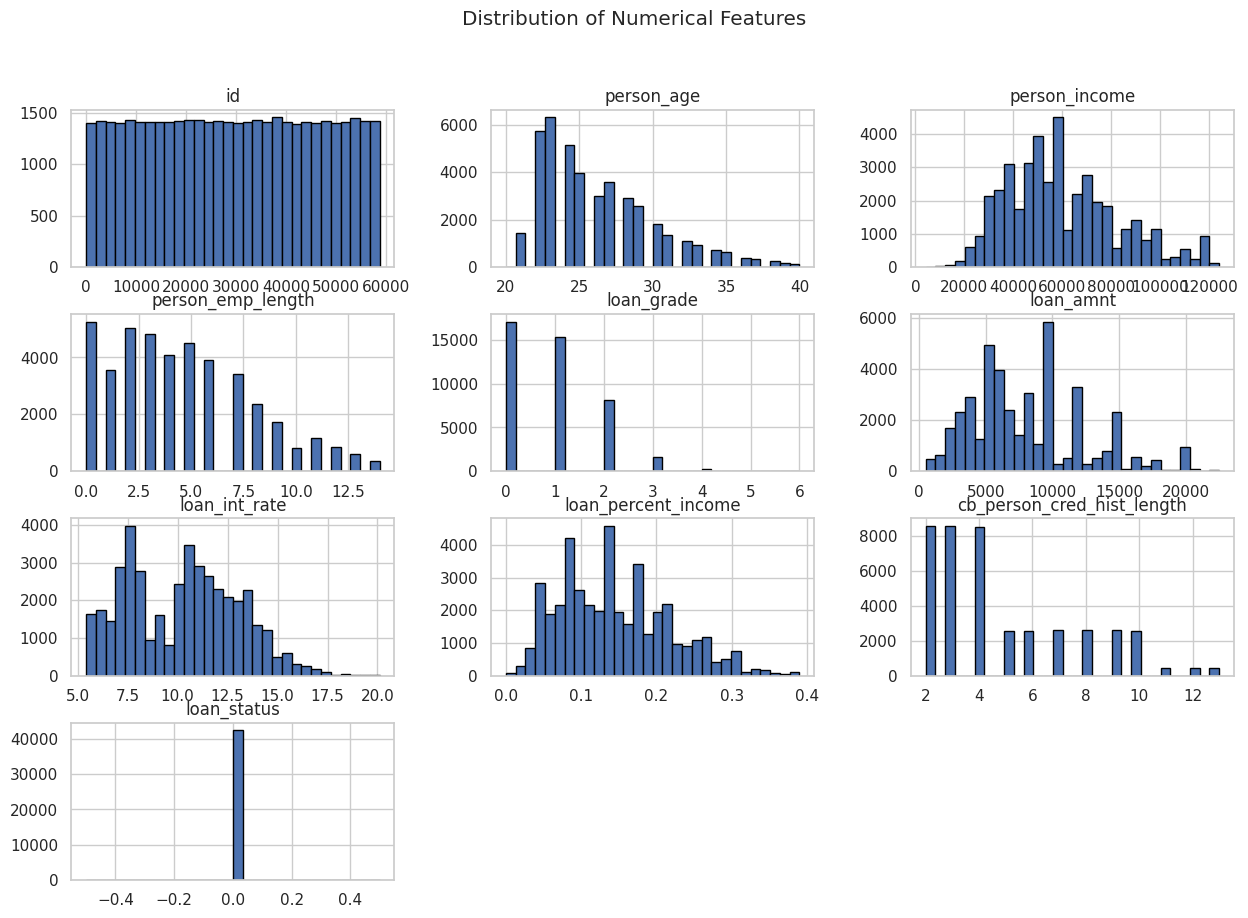

In [185]:
# Distribution of numerical features
df[numeric_features].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

id                           NaN
person_age                   NaN
person_income                NaN
person_emp_length            NaN
loan_amnt                    NaN
loan_int_rate                NaN
loan_percent_income          NaN
cb_person_cred_hist_length   NaN
loan_status                  NaN
Name: loan_status, dtype: float64


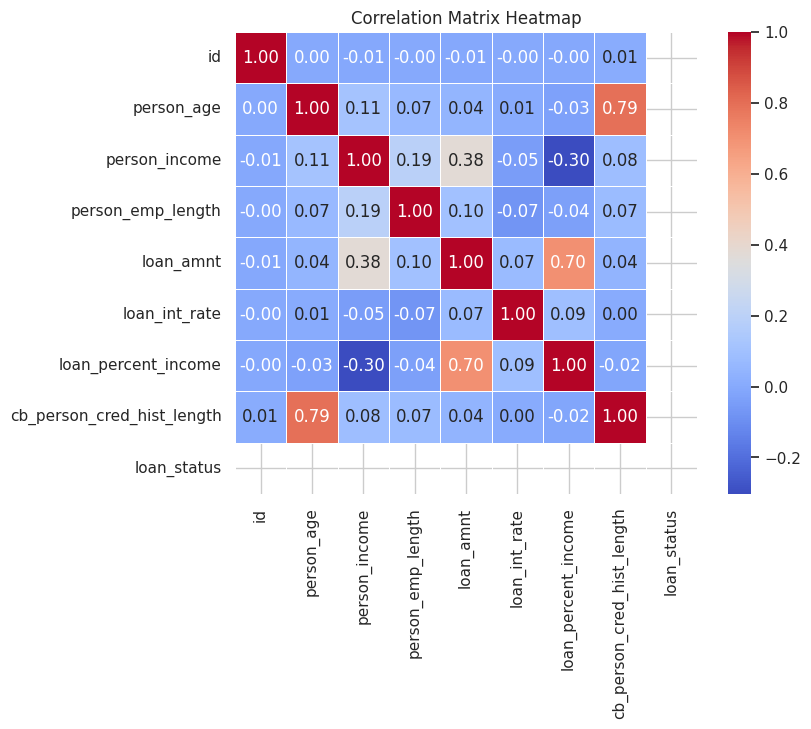

In [186]:
target = 'loan_status'
# Calculate the correlation matrix
correlation_matrix = df[numeric_cols_names].corr()

correlation_with_target = correlation_matrix[target].abs().sort_values(ascending=False)

# Display features with correlation with the target
print(correlation_with_target)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [187]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Load your dataset
X = df.drop('loan_status', axis=1)  # Features
y = df['loan_status']                # Target variable

# Check the data types of your features
print(X.dtypes)

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-Numeric Columns:", non_numeric_columns)

# Option 1: Drop non-numeric columns (if not needed)
X = X.drop(non_numeric_columns, axis=1)

# Option 2: Convert non-numeric columns (if needed)
# Uncomment below if you wish to use one-hot encoding for categorical features
# X = pd.get_dummies(X, columns=non_numeric_columns, drop_first=True)

# Check for missing values
print("Missing Values in Features:\n", X.isnull().sum())

# Create a model
model = LinearRegression()

# Create RFE model and select top n features
n_features_to_select = 8 # Change this to the desired number of features
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
fit = rfe.fit(X, y)

# Get selected features
selected_features = X.columns[fit.support_]
print("Selected Features: ", selected_features)


id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                      int64
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object
Non-Numeric Columns: Index(['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'], dtype='object')
Missing Values in Features:
 id                            0
person_age                    0
person_income                 0
person_emp_length             0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
dtype: int64
Selected Features:  Index(['person_age', 'person_income', 'person_emp_length', 'loan_g

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Add 'cb_person_cred_hist_length' to selected features
selected_features = ['person_age', 'person_income', 'person_emp_length', 'loan_grade',
                     'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
X = df[selected_features]
y = df['loan_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessor
numeric_features = ['person_age', 'person_income', 'person_emp_length',
                    'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_features = ['loan_grade']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Apply the preprocessing to the training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Debug: Check shapes to confirm preprocessing
print("Training data shape:", X_train_preprocessed.shape)
print("Testing data shape:", X_test_preprocessed.shape)


Training data shape: (33969, 14)
Testing data shape: (8493, 14)


In [192]:
# Set the preprocessed train and test data
X_train_clean = X_train_preprocessed
y_train_clean = y_train
X_test_clean = X_test_preprocessed
y_test_clean = y_test

# Check class distribution in training data
unique_classes = np.unique(y_train_clean)
if len(unique_classes) < 2:
    raise ValueError("Training data contains only one class. Please ensure that both classes are present.")

# Creating a function to tune models and evaluate them
def evaluate_model(model, params):
    pipeline = Pipeline(steps=[
        ('classifier', model)
    ])

    grid_search = GridSearchCV(pipeline, params, scoring='roc_auc', cv=5, n_jobs=-1)
    grid_search.fit(X_train_clean, y_train_clean)

    return grid_search.best_estimator_, grid_search.best_score_

# Define LightGBM model and hyperparameters for tuning
model = LGBMClassifier()
params = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [-1, 3, 5, 7],  # -1 means no limit
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

# Evaluate the model
best_model, best_auc = evaluate_model(model, params)
print(f"LightGBM - Best AUC: {best_auc:.4f}")

# Step 6: Evaluate the best model on the test set, if it has both classes
if len(np.unique(y_test_clean)) >= 2:
    y_pred_proba = best_model.predict_proba(X_test_clean)[:, 1]
    auc = roc_auc_score(y_test_clean, y_pred_proba)
    print(f"LightGBM Test AUC: {auc:.4f}")
else:
    print("Test data contains only one class. ROC AUC score is not defined.")

NameError: name 'np' is not defined